Question 1

In [ ]:
# Use only numpy library
import numpy as np

# Randomly initialize centroids at the beginning
def centroid_init(data, num_samples, k):
    centroids = data[np.random.choice(num_samples, k, replace=False)]
    return centroids

# Cluster Assignment function
def distance(data, centroids, num_samples, assignments):
    cluster_dict = dict()
    for i in range(num_samples):
        x_i = 0
        distance = np.linalg.norm(data[i] - centroids[0])
        for j in range(1, k):
            if distance > np.linalg.norm(data[i] - centroids[j]):
                x_i = j
                distance = np.linalg.norm(data[i]-centroids[j])

        assignments[i] = x_i

        if x_i not in cluster_dict:
            cluster_dict[x_i] = [i]

        else:
            cluster_dict[x_i].append(i)
            
    return cluster_dict

# Move centroid function
def move_centroid(data, cluster_dict, cluster_c):
    for x, samples in cluster_dict.items():
        cluster_c[x] = np.mean(np.array([data[i] for i in samples]), axis=0)
        
    return cluster_c

def k_means(data, k):
    # Get the number of samples from the breast cancer data
    num_samples = data.shape[0]
    # Initialize centroids randomly
    cluster_c = centroid_init(data, num_samples, k)
    # Create numpy array of zeroes of the number of features of the data
    past_c = np.zeros((k, data.shape[1]))
    # Create a cluster assignment numpy array that's empty of the number of samples of data
    assignments = np.empty(num_samples, dtype=np.int8)

    flag = True
    while flag == True:
        # Initialize a cluster dictionary and assign it to the cluster assignment function
        cluster_dict = dict()
        cluster_dict = distance(data, cluster_c, num_samples, assignments)

        # Assign the cluster centroids to the new moved centroids
        cluster_c = move_centroid(data, cluster_dict, cluster_c)

        # End the while loop if the old centroids are the same as the new centroid assignments
        if (cluster_c == past_c).all():
            flag = False

        # Assign the old centroids to the new centroids after checking if they were equal before    
        past_c = np.copy(cluster_c)
        
    return assignments, cluster_c

Question 2

In [ ]:
# Import the breast cancer dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer().data
distortion_list = []
num_samples = data.shape[0]

# Function to calculate k-means distortion
def k_means_distortion(data, assignments, cluster_c):
    distortion = 0
    for i in range(num_samples):
        distortion = distortion + np.linalg.norm(data[i] - cluster_c[assignments[i]])**2
    distortion_result = distortion/num_samples
    return distortion_result

# Go through k for 2 to 7 (included) and find distortion 
for k in range(2,8):
    assignments, cluster_c = k_means(data, k)
    distortion_result = k_means_distortion(data, assignments, cluster_c)
    distortion_list.append(distortion_result)
    print("For k-value of", k, "the corresponding distortion value is:", distortion_result)

For k-value of 2 the corresponding distortion value is: 136982.6008405956
For k-value of 3 the corresponding distortion value is: 88783.42629047789
For k-value of 4 the corresponding distortion value is: 51364.748070263326
For k-value of 5 the corresponding distortion value is: 36331.63689693994
For k-value of 6 the corresponding distortion value is: 30099.055519437814
For k-value of 7 the corresponding distortion value is: 26812.529073492948


Question 3

Text(0, 0.5, 'Distortion, J')

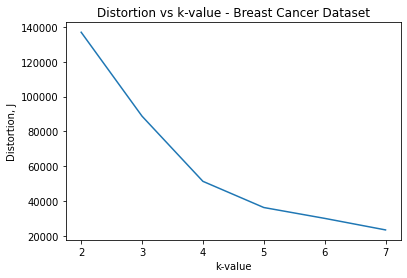

In [ ]:
import matplotlib.pyplot as plt
k = np.arange(2, 8, 1)
plt.plot(k, distortion_list)
plt.title("Distortion vs k-value - Breast Cancer Dataset")
plt.xlabel("k-value")
plt.ylabel("Distortion, J")

Question 4

In [ ]:
# ----- Question 4 ------
# I would choose k-value of 5 by inspection from the plot we have in Question 3. 
# I would choose this value because from the plot, the distortion begins to plateau after the k-value of 5.
# There are drastic distortion value decreases from k=1 to k=5 but the decrease from k=5 to k=6 is minimal.
# Futhermore, the decrease from k=6 to k=7 is also minimal and the following k values after 7 would have a small decrease as well.
# Therefore, due to the distortion value reaching a plateau at k=5, I would select 5 as the k-value.